# Project Statement
- In this task our goal is to build a model for that can recongnize the hand written char.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0
100% 184M/185M [00:02<00:00, 118MB/s]
100% 185M/185M [00:02<00:00, 83.5MB/s]


In [3]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [4]:
df=pd.read_csv('/content/A_Z Handwritten Data.csv')
df.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(372450, 785)

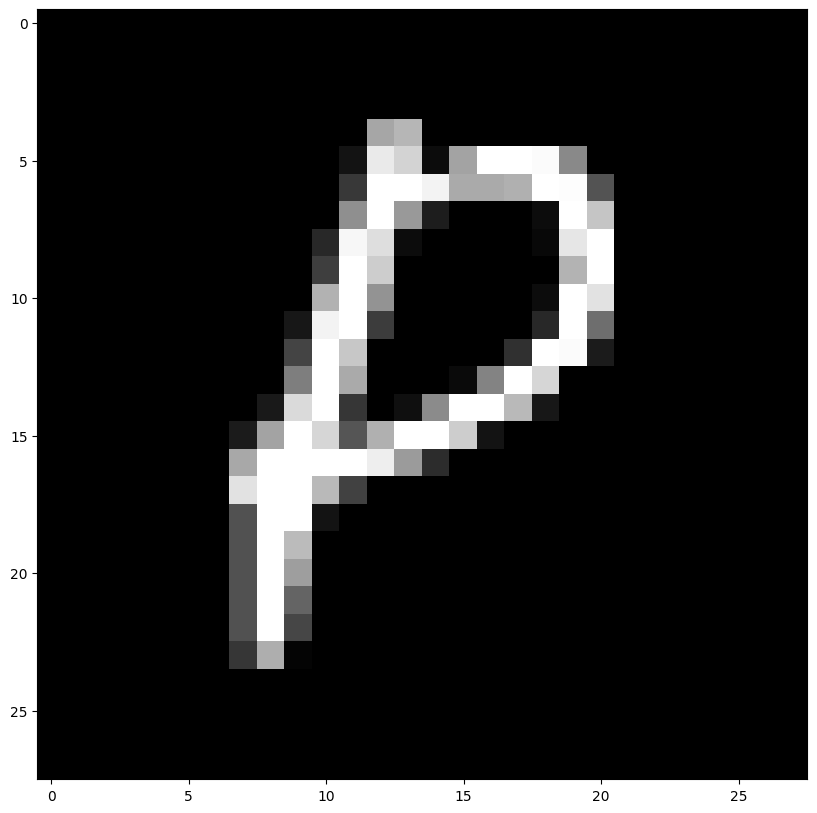

In [6]:
# plot the random char
import random
sample=random.randint(1,372450)
plt.figure(figsize=(10,10))
plt.imshow(df.iloc[sample,1:].values.reshape(28,28),cmap="gray")

# Check the distrubution of data

In [7]:
# Id to label
id2label={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',
          9:'j',10:"k",11:'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p',
          16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}

# label to id
label2id={value:index for index,value in id2label.items()}

In [8]:
# Convert the id to label
df['0']=df['0'].map(id2label)

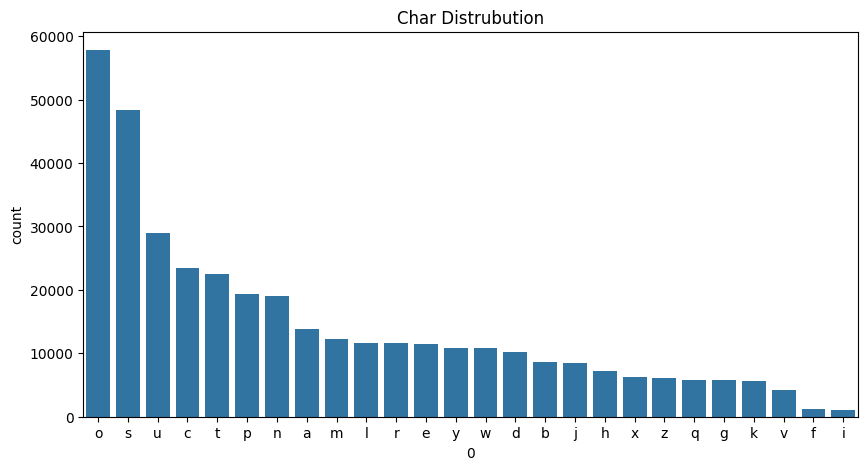

In [9]:
plt.figure(figsize=(10,5))
plt.title("Char Distrubution")
sns.barplot(x=df['0'].value_counts().index,y=df['0'].value_counts())
plt.show()

# Observation
- We can see that data in imbalance so we can apply data augmentaion during model building

In [10]:
# convert bacl the label to id
df['0']=df['0'].map(label2id)

# Saperate feature and label

In [11]:
feature=df.drop(columns=['0'])
label=df['0']

In [12]:
feature.head(2)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
label.head(2)

,0
0,0
1,0


# Train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [15]:
x_train.shape

(297960, 784)

In [16]:
x_test.shape

(74490, 784)

In [17]:
len(df['0'].unique())

26

# Build a datagenerator

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Train data generator
train_datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    rescale=1/255
)

# Test datagenerator
test_datagen=ImageDataGenerator(rescale=1/255)

In [20]:
# Train generator
train_generator=train_datagen.flow(x_train.values.reshape(-1,28,28,1),y_train.values,batch_size=32)

# Test generator
test_generator=test_datagen.flow(x_test.values.reshape(-1,28,28,1),y_test)

# Build the `CNN` Model

In [21]:
model=Sequential()

# Add a conv2d layer
model.add(layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(28,28,1)))

# Add a max pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Add another conv2d layer
model.add(layers.Conv2D(filters=16,kernel_size=3,padding='valid',activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten and feed to output layer
model.add(layers.Flatten())

# Add a output layer
model.add(layers.Dense(len(df['0'].unique()),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 26)                  │          10,426 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,370 (60.04 KB)

 Trainable params: 15,370 (60.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Add a early stoping and model check point

In [24]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [25]:
# Early Stoping
early_stoping=EarlyStopping(monitor='val_loss',patience=3)

# Model checkpoint
checkpoint=ModelCheckpoint(filepath='/models/best_model.keras',monitor='val_loss',save_best_only=True)

In [27]:
history=model.fit(train_generator,epochs=20,validation_data=(test_generator),
          callbacks=[early_stoping,checkpoint])

Epoch 1/20
9306/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8084 - loss: 0.6617

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 220s 24ms/step - accuracy: 0.8085 - loss: 0.6615 - val_accuracy: 0.9709 - val_loss: 0.1086
Epoch 2/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 210s 23ms/step - accuracy: 0.9449 - loss: 0.1951 - val_accuracy: 0.9746 - val_loss: 0.0973
Epoch 3/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 211s 23ms/step - accuracy: 0.9568 - loss: 0.1515 - val_accuracy: 0.9767 - val_loss: 0.0864
Epoch 4/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 211s 23ms/step - accuracy: 0.9621 - loss: 0.1342 - val_accuracy: 0.9764 - val_loss: 0.0859
Epoch 5/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 209s 22ms/step - accuracy: 0.9647 - loss: 0.1248 - val_accuracy: 0.9797 - val_loss: 0.0769
Epoch 6/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 209s 22ms/step - accuracy: 0.9677 - loss: 0.1155 - val_accuracy: 0.9796 - val_loss: 0.0776
Epoch 7/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 212s 23ms/step - accuracy: 0.9685 - loss: 0.1147 - val_accuracy: 0.9815 - val_loss: 0.0723
Epoch 8/20
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 210s 23ms/step - accuracy: 0.9695 - lo

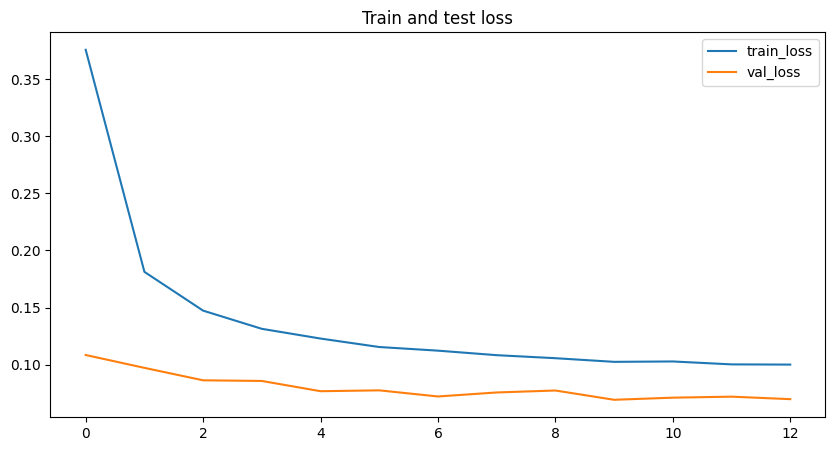

In [28]:
plt.figure(figsize=(10,5))
plt.title("Train and test loss")
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

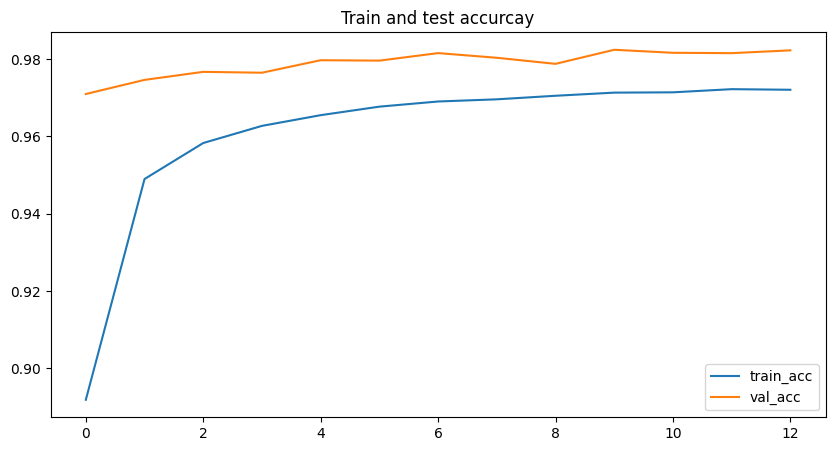

In [29]:
plt.figure(figsize=(10,5))
plt.title("Train and test accurcay")
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [39]:
test_result=model.evaluate(test_generator)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0710


In [40]:
print('Loss: ',test_result[0])
print('Accuracy: ',test_result[1])

Loss:  0.06994755566120148
Accuracy:  0.982225775718689


In [30]:
model.save("char_model.keras")

# Model Prediction on new data

In [31]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [36]:
# Load the saved model
model = load_model("char_model.keras")

# Load and preprocess the new image
image_path = '/content/o.png'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)  # Reshape for model input
image_array = image_array / 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)

# Map predicted class to character
id2label = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i',
          9: 'j', 10: "k", 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p',
          16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}
predicted_char = id2label[predicted_class]

print("Predicted character:", predicted_char)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
Predicted character: q
